# Classifier Example (Iris Dataset)
<a href='https://en.wikipedia.org/wiki/Iris_flower_data_set'><img src='IrisFlower.jpg' width=400 height=400/></a>

## Project Description
The Iris flower data set is a multivariate dataset introduced by the British statistician and biologist Ronald Fisher in his 1936 paper.

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.
Based on the combination of these four features, developed a basic classifier to distinguish the species from each other.<br>
<img src='IrisFlowers.png' width=600 height=400/></a>

## Libraries

In [1]:
import seaborn as sb
import pandas as pd

## Import Dataset

In [2]:
# Data is available on Internet, and also on SeaBorn Library
Iris=sb.load_dataset('iris')

# You can also import the CSV data, which is available for download to your PC

#Iris=pd.read_csv('IRIS_Dataset.csv')

## Review Dataset

In [3]:
Iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Check How Many Categories

In [4]:
Iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

### Check Correlation between Variables

<AxesSubplot:>

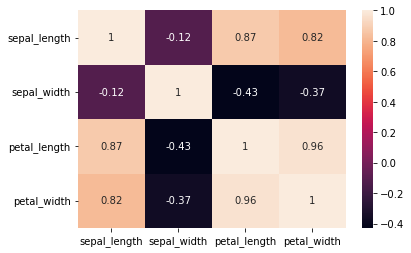

In [5]:
sb.heatmap(Iris.corr(), annot=True)

### Check for Outlies

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

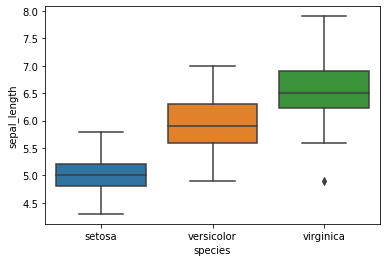

In [6]:
sb.boxplot(x='species', y='sepal_length', data=Iris)

##### <font color='red'> ??? Google to find out, how you may remove the one outlier in Virginica! 

### Check the Histogram of each Feature

<AxesSubplot:xlabel='sepal_length', ylabel='Count'>

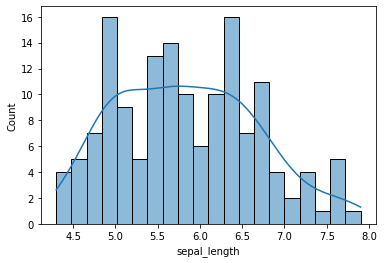

In [7]:
sb.histplot(Iris['sepal_length'], kde=True, bins=20)

### Compare the Distributions

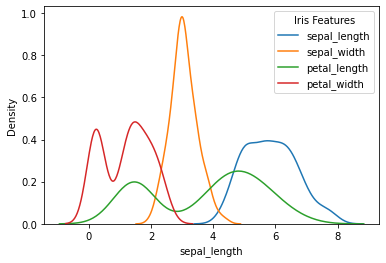

In [8]:
sb.kdeplot(Iris['sepal_length'])
sb.kdeplot(Iris['sepal_width'])
sb.kdeplot(Iris['petal_length'])
sb.kdeplot(Iris['petal_width'])

import matplotlib.pyplot as plt
plt.legend(title='Iris Features', loc='upper right', labels=['sepal_length', 'sepal_width','petal_length','petal_width'])

### Compare Distribution for each Flower Type

<AxesSubplot:xlabel='species', ylabel='petal_length'>

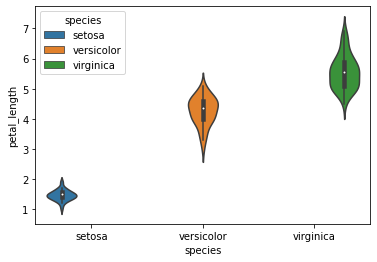

In [9]:
sb.violinplot(x='species', y='petal_length', data=Iris, hue='species')

### Check Correlation and Distribution between each Pair of Features

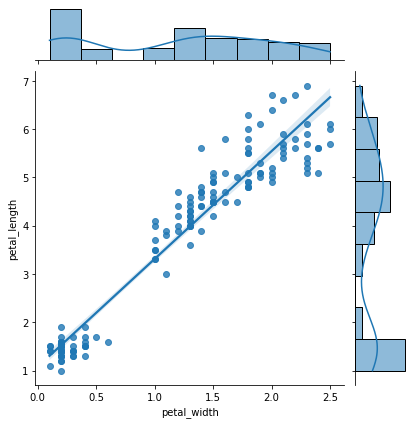

In [10]:
sb.jointplot(x='petal_width' , y='petal_length' , data=Iris, kind='reg')

### Check Distribution between each Pair of Features

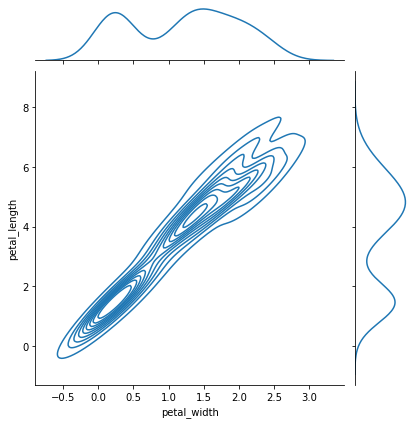

In [11]:
sb.jointplot(x='petal_width' , y='petal_length' , data=Iris, kind='kde')

# Data Preprocessing

##### * No missing data ✓
##### * No outlier data ✓

## Input and Output

In [12]:
X = Iris.iloc[:, :-1].values
y = Iris.iloc[:, -1].values

In [13]:
# A Quick check to make sure...
pd.DataFrame(y)

,0
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


## Categorical Data
For label data (y in this case the type of flowers) always use LabelEncoder

In [14]:
from sklearn.preprocessing import LabelEncoder
LaEnc = LabelEncoder()
y = LaEnc.fit_transform(y)

In [15]:
# A quick check to make sure ....
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Splitting the Dataset into the Training set and Test set

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20) #, random_state = 0

In [17]:
# A quick check to make sure ...
pd.DataFrame(y_train)

,0
0,0
1,1
2,0
3,2
4,0
...,...
115,1
116,0
117,1
118,0


## Feature Scaling

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

##### <font color=red> Wait!!!<br>👀
##### <font color=blue> Why we use fit_transform() on training data but transform() on the test data? 😕 <br>
We call fit_transform() method on our training data and transform() method on our test data. But the actual question is why do we do this? <br>
For example, when we are building a k-Nearest Neighbor model and we have to scale our features. The most common way to scale the features is through scikit-learn’s StandardScaler class.<br>
Recall, Data standardization is the process of rescaling the attributes so that they have mean as 0 and variance as 1. The ultimate goal to perform standardization is to bring down all the features to a common scale without distorting the differences in the range of the values.<br>
In sklearn.preprocessing.StandardScaler(), fit_transform() is used on the training data so that we can scale the training data and also learn the scaling parameters of that data. Here, the model built by us will learn the mean and variance of the features of the training set. These learned parameters are then used to scale our test data.<br>
So what actually is happening here! 🤔<br>
The fit method is calculating the mean and variance of each of the features present in our data. The transform method is transforming all the features using the respective mean and variance.<br>
Now, we want scaling to be applied to our test data too and at the same time do not want to be biased with our model. We want our test data to be a completely new and a surprise set for our model. The transform method helps us in this case. <br>
Using the transform method we can use the same mean and variance as it is calculated from our training data to transform our test data. Thus, the parameters learned by our model using the training data will help us to transform our test data.<br>
Now the question is why we did this? 🙃<br>
Here is the simple logic behind it!<br>
If we will use the fit method on our test data too, we will compute a new mean and variance that is a new scale for each feature and will let our model learn about our test data too. Thus, what we want to keep as a surprise is no longer unknown to our model and we will not get a good estimate of how our model is performing on the test (unseen) data which is the ultimate goal of building a model using machine learning algorithm.<br>
This is the standard procedure to scale our data while building a machine learning model so that our model is not biased towards a particular feature of the dataset and at the same time prevents our model to learn the features/values/trends of our test data.<br>
##### <font color=blue> In summary, we always apply fit_transform(X_train) to the training data, and only transform(X_test) to the test data. <br>
Still Confused: Read more here: https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe
    
By the way, you can copy emojis from https://getemoji.com/, and paste on Markdown cells ⚙️ <br>

##### <font color='magenta'> Now, our data is ready to go through Classifiers ....  🤠<br>

# Classification

## KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier
KNNclassifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
KNNclassifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

<font color=red> Note: <font color=black>"minkowski" with p=2 is equivalent to the standard Euclidean metric.
In ML, we can use differnt distances, the typical one are:<br>

Manhattan: p=0 <br>
Euclidean: p=2 <br>
Chebyshev: p=∞ <br>
Minkowski: p= any other numbers <br>

The most common is the Euclidean<br>

If you are interested in, you may read more on this topic here:<br>
https://rittikghosh.com/Minkowski_distance.html

## Comparing the Predicted with Actual Results of Test Set

In [20]:
y_pred = KNNclassifier.predict(X_test)

compare=[y_pred,y_test]
pd.DataFrame(compare)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,2,2,1,0,0,0,0,2,1,0,...,1,0,0,1,2,1,1,0,1,1
1,2,2,1,0,0,0,0,2,2,0,...,1,0,0,1,2,1,1,0,1,1


## Confusion Matrix

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Your Model Accuracy is=", accuracy_score(y_test, y_pred)*100, "%")

[[10  0  0]
 [ 0 11  1]
 [ 0  2  6]]
Your Model Accuracy is= 90.0 %


##### <font color=red> Confusion Matrix <br>
A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.<br>
I will review this during the lecture. If you are interested in learning more, this linke is a good source: https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/

## SVM

In [22]:
from sklearn.svm import SVC
SVMclassifier = SVC(kernel = 'rbf', random_state = 0)
SVMclassifier.fit(X_train, y_train)

SVC(random_state=0)

<font color=blue> As explianed during the lecture, you may try different Kernels such as:<br>
    - Polynomial Kernel<br>
    - Gaussian Radial Basis Function (RBF) Kernel<br>
    - Linear Kernel,<br>
    - sigmoid Kernel,<br>

classifier = SVC(kernel = 'poly',degree=3)<br>
classifier = SVC(kernel = 'linear') <br>
classifier = SVC(kernel = 'sigmoid') <br>
classifier = SVC(kernel = 'rbf')


In [23]:
y_pred = SVMclassifier.predict(X_test)

## Confusion Matrix

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Your Model Accuracy is=", accuracy_score(y_test, y_pred)*100, "%")

[[10  0  0]
 [ 0 10  2]
 [ 0  0  8]]
Your Model Accuracy is= 93.33333333333333 %


In [25]:
# You can use the same appraoch and use this one to predict...

## Naive Bayes 

In [26]:
from sklearn.naive_bayes import GaussianNB
NBclassifier = GaussianNB()
NBclassifier.fit(X_train, y_train)

GaussianNB()

<font color=magenta> (Optional) We covered Naive Bayes during the lecture. In this short video on this link you can learn more details on Gaussian Naive bayes:
    https://www.youtube.com/watch?v=H3EjCKtlVog
    

In [27]:
y_pred = NBclassifier.predict(X_test)

## Confusion Matrix

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Your Model Accuracy is=", accuracy_score(y_test, y_pred)*100, "%")

[[10  0  0]
 [ 0 11  1]
 [ 0  0  8]]
Your Model Accuracy is= 96.66666666666667 %


## Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier
Treeclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
Treeclassifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

<font color=red> Note: <font color=black>
A tree is composed of nodes, and those nodes are chosen looking for the optimum split of the features. For that purpose, different criteria exist. In the decision tree Python implementation of the scikit-learn library, this is made by the parameter ‘criterion‘. This parameter is the function used to measure the quality of a split and it allows users to choose between ‘gini‘ or ‘entropy‘.<br>
How does each criterion find the optimum split? And, what are the differences between both of them? <br>
This is beyond the scope of this course; but you may read all the details you need to know here from this link:
https://quantdare.com/decision-trees-gini-vs-entropy/

In [30]:
y_pred = Treeclassifier.predict(X_test)

## Confusion Matrix

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Your Model Accuracy is=", accuracy_score(y_test, y_pred)*100, "%")

[[10  0  0]
 [ 0 10  2]
 [ 0  0  8]]
Your Model Accuracy is= 93.33333333333333 %


## Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
Forestclassifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
Forestclassifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

<font color=red> How many trees in the Random Forest?: <font color=black>
The optimal number of trees in the Random Forest depends on the number of rows in the data set. The more rows in the data, the more trees are needed <br>
This is beyond the scope of this course; but you may read all the details you need to know here from this link:
https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [33]:
y_pred = Forestclassifier.predict(X_test)

## Confusion Matrix

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Your Model Accuracy is=", accuracy_score(y_test, y_pred)*100, "%")

[[10  0  0]
 [ 0 10  2]
 [ 0  1  7]]
Your Model Accuracy is= 90.0 %


# Conclusion
We tried 4 Models (KNN< SVM, Naive B, Tree and Forest), and all gave a perfect accuracy. We can use one of them for prediction.👌

# Use the Model to Predict
Now, suppose, you go out, find out an Iris Flower, have no idea what type it is! You take out your ruler, and make 4 simple measurements:
* Sepal_Length
* Sepal_Width
* Petal_Length
* Petal_Width
And use your model to figure out the type! 
<a href='https://en.wikipedia.org/wiki/Iris_flower_data_set'><img src='IrisFlower.jpg' width=400 height=400/></a>

In [35]:
#YourMeasurement= [[5.1,3.5,1.4,0.2]]
#YourMeasurement= [[7,3.2,4.7,1.4]]
YourMeasurement= [[6.7,2.5,5.8,1.8]]

# We can use any of the above Classifier

Flower=NBclassifier.predict(sc.transform(YourMeasurement))

if Flower==0:
    print("This is Setosa")
elif Flower==1:
    print("This is Versicolor")
else:
    print("This is Virginica")

This is Virginica


##### End